## House Price Prediction
#### Description : This is a notebook for visualization of various features which the sales price of houses.

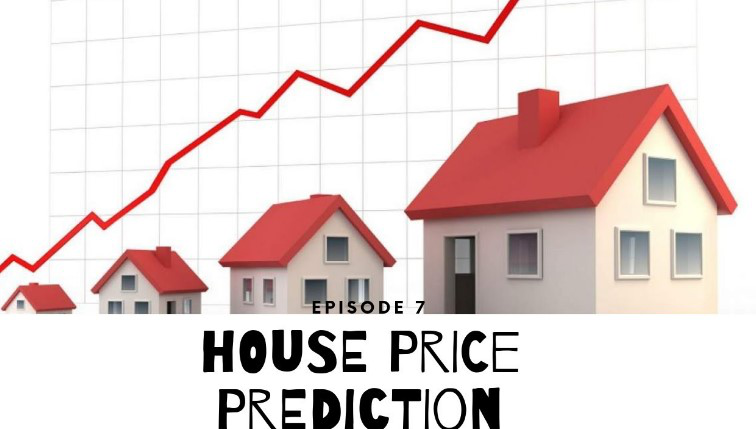

In [9]:
from PIL import Image
img= Image.open('map')
img

### Import package


In [14]:
## 1. Load Data

# First lets import all the libraries that will be used to load train and test datasets and data manipulation.

#### Import libraries

In [3]:
### Pandas 

import pandas as pd

In [125]:
### Numpy and Matplotlib

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [126]:
### Machine Learning 

from sklearn import preprocessing

### Get Data in Dataframe 


In [11]:
train = pd.read_csv(r'C:\Users\soumg\Desktop\train_data.csv')
test = pd.read_csv(r'C:\Users\soumg\Desktop\test_data.csv')

In [13]:
# head() shows the first 5 rows of the data
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
#   There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   int64  
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1084 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          83 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBuil

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1605 non-null   int64  
 1   MSZoning       1601 non-null   object 
 2   LotFrontage    1349 non-null   float64
 3   LotArea        1605 non-null   int64  
 4   Street         1605 non-null   object 
 5   Alley          115 non-null    object 
 6   LotShape       1605 non-null   object 
 7   LandContour    1605 non-null   object 
 8   Utilities      1603 non-null   object 
 9   LotConfig      1605 non-null   object 
 10  LandSlope      1605 non-null   object 
 11  Neighborhood   1605 non-null   object 
 12  Condition1     1605 non-null   object 
 13  Condition2     1605 non-null   object 
 14  BldgType       1605 non-null   object 
 15  HouseStyle     1605 non-null   object 
 16  OverallQual    1605 non-null   int64  
 17  OverallCond    1605 non-null   int64  
 18  YearBuil

### 2. Data Manipulation and Visualization

Lets check for NaN (null) values in the data

In [18]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      230
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

LotFrontage has 230 null values

In [20]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      256
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

MSZoning has 4 null values,
LotFrontage has 256 nullvalues,
SaleType has 1 null values,

#### Lets check for the mean, standard deviation for Sales price 

In [21]:
train['SalePrice'].describe()

count      1314.000000
mean     181307.531202
std       78402.449093
min       34900.000000
25%      130000.000000
50%      163250.000000
75%      214375.000000
max      745000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

###### Determining the Skewness of data

In [28]:
print ("Skewness is:", train.SalePrice.skew())

Skewness is: 1.7465098247478266


In [29]:
print ("Kurtosis is:", train.SalePrice.kurt())

Kurtosis is: 5.426632982371454


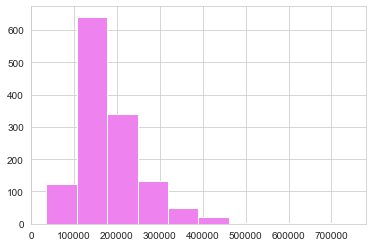

In [42]:
plt.hist(train.SalePrice, color='violet')
plt.show()

In [35]:
train['Skewed_SP'] = np.log(train['SalePrice']+1)
print ("Skewness is:", train['Skewed_SP'].skew())

Skewness is: 0.07478049213869122


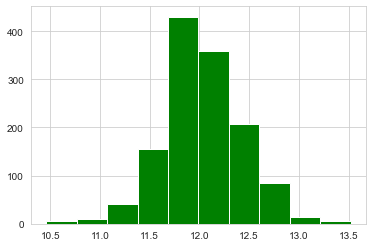

In [36]:
plt.hist(train['Skewed_SP'], color='green')
plt.show()

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\soumg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From vers

20     483
60     267
50     137
120     80
30      59
160     55
70      54
80      52
90      44
190     26
85      19
75      15
45      11
180     10
40       2
Name: MSSubClass, dtype: int64

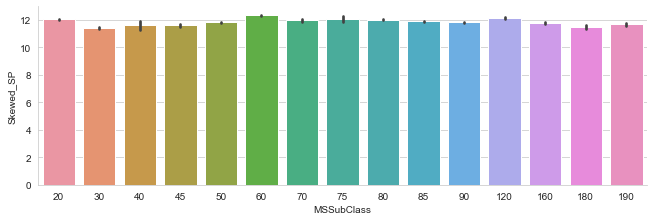

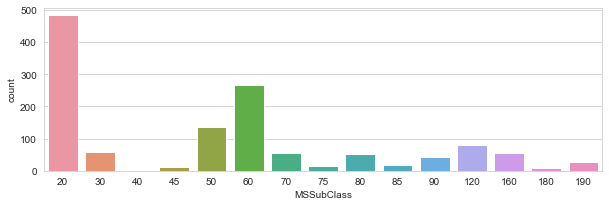

In [44]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()

###### MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest.

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\soumg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RL         1033
RM          198
FV           58
RH           15
C (all)      10
Name: MSZoning, dtype: int64

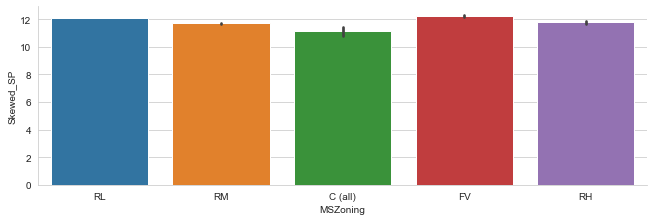

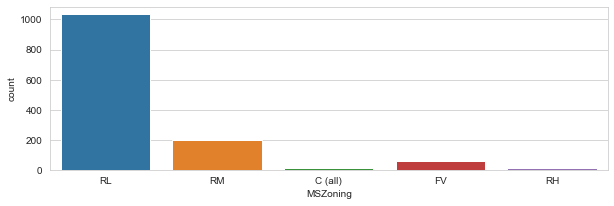

In [45]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train, ax=axis1)
train['MSZoning'].value_counts()

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


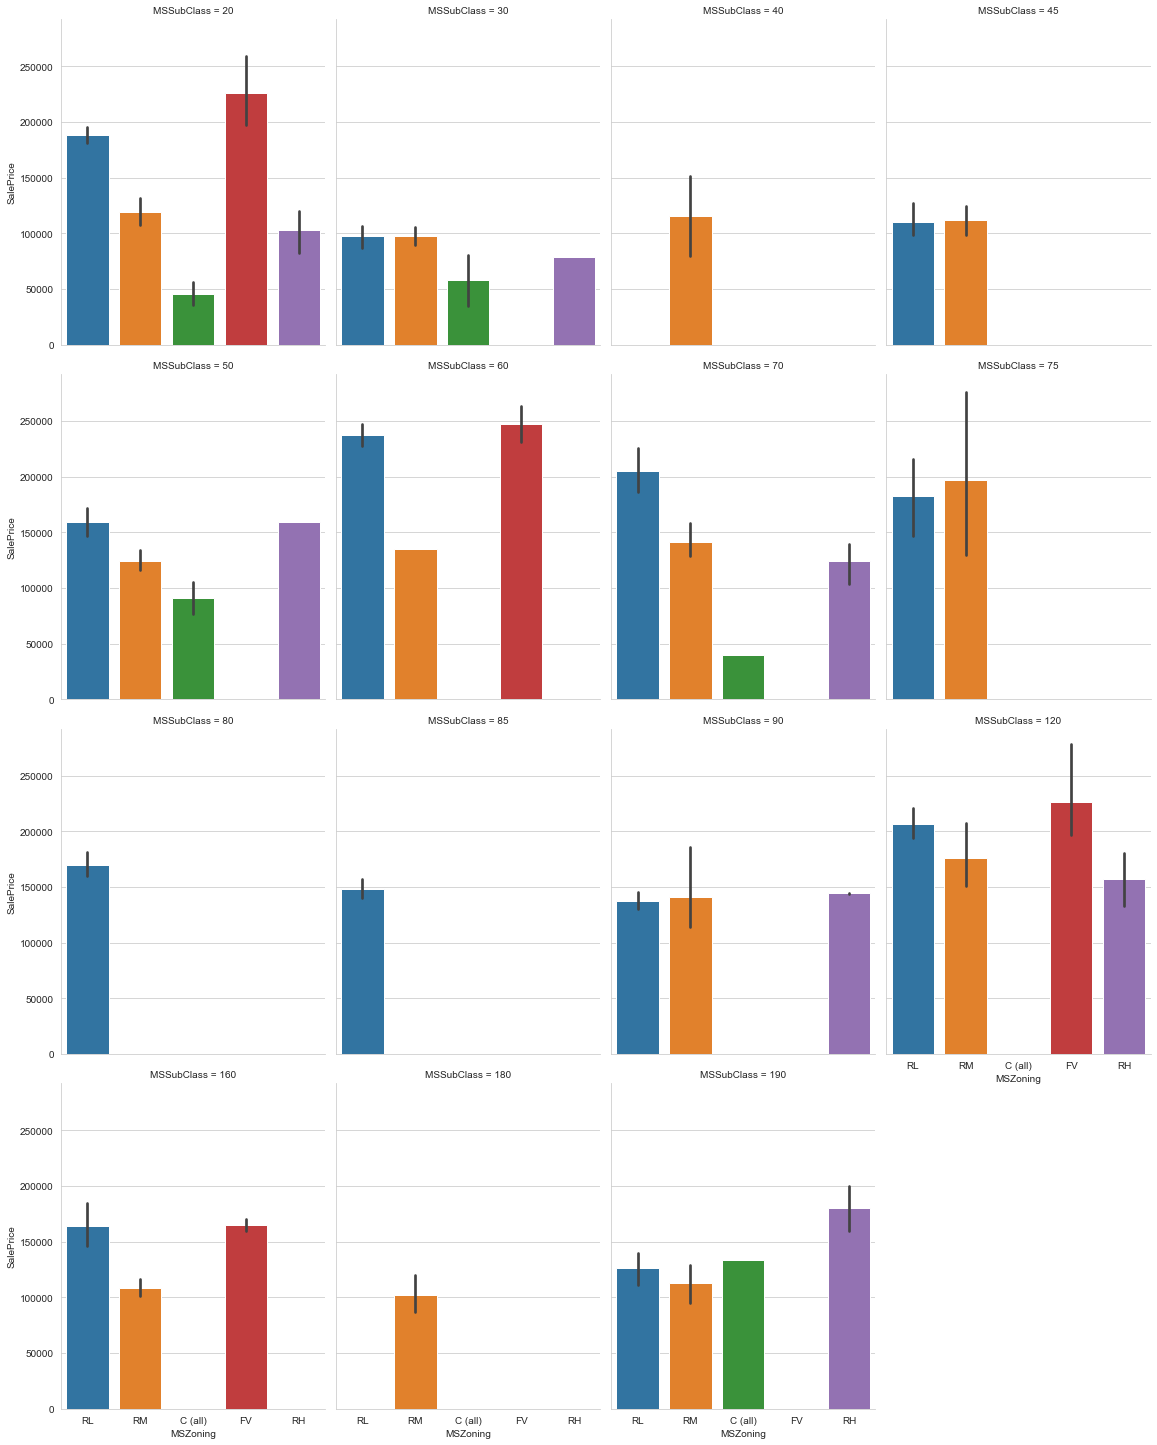

In [48]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)

###### Lets analyze the numeric features using the numpy library 

In [49]:
n_f = train.select_dtypes(include=[np.number])
n_f.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
Skewed           float64
dtype: object

##### Then we will try to find the corretation between the feature and target


In [58]:
corr = n_f.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:3], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-3:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice    1.000000
Skewed       0.950386
Skewed_SP    0.950386
Name: SalePrice, dtype: float64 

MSSubClass      -0.094475
EnclosedPorch   -0.124006
KitchenAbvGr    -0.127528
Name: SalePrice, dtype: float64
SalePrice        1.000000
Skewed           0.950386
Skewed_SP        0.950386
OverallQual      0.795257
GrLivArea        0.698051
GarageCars       0.644704
GarageArea       0.625332
TotalBsmtSF      0.604720
1stFlrSF         0.603744
FullBath         0.567730
TotRmsAbvGrd     0.539282
YearBuilt        0.524805
YearRemodAdd     0.517417
GarageYrBlt      0.495172
Fireplaces       0.464217
MasVnrArea       0.451603
BsmtFinSF1       0.378424
LotFrontage      0.353262
WoodDeckSF       0.322098
OpenPorchSF      0.319066
2ndFlrSF         0.301453
LotArea          0.279920
HalfBath         0.272821
BsmtFullBath     0.225587
BsmtUnfSF        0.211180
BedroomAbvGr     0.172475
ScreenPorch      0.122175
PoolArea         0.098367
MoSold           0.058180
3SsnPorch        0.047051
BsmtFinSF2

####  NOw We will analyze the features in their descending of correlation with sales price

In [64]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [60]:
train.OverallQual.nunique()

10

###### Creating a pivot table 

In [65]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [69]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,82000.0
4,108000.0
5,132500.0
6,160000.0
7,202150.0
8,270000.0
9,345000.0


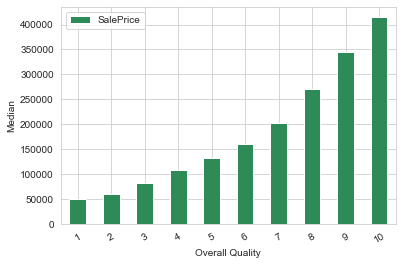

In [72]:
quality_pivot.plot(kind='bar',color='seagreen')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

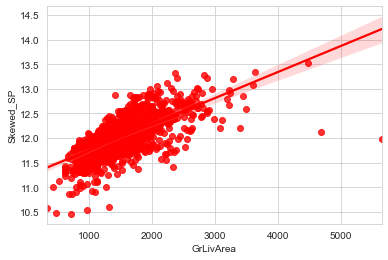

In [74]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train,color = 'red')

###### Now we'll Remove outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

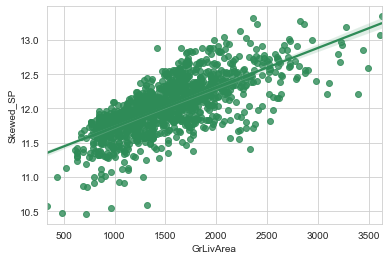

In [77]:
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train, color= 'seagreen')

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

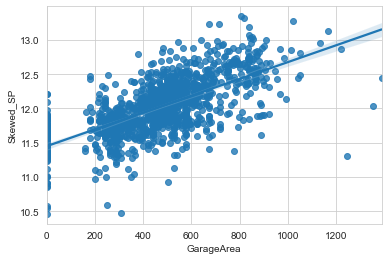

In [78]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

#### GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

Removing outliers

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

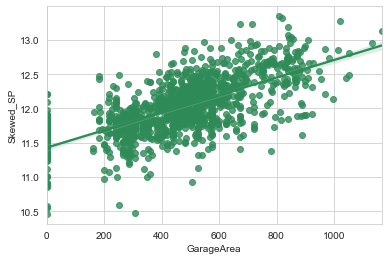

In [80]:
train = train[train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=train,color='seagreen')

##### we'll now remove those null values...

In [85]:
null_value = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
null_value.columns = ['Null_value  Count']
null_value.index.name = 'Feature'
null_value

,Null_value Count
Feature,
PoolQC,1302
MiscFeature,1259
Alley,1224
Fence,1043
FireplaceQu,615
LotFrontage,229
GarageQual,73
GarageType,73
GarageFinish,73


##### # Pool null value refers to no pool area/

In [86]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [87]:
print ("Unique values are:", train.MiscFeature.nunique())

Unique values are: 4


#### lets Analysing the non numeric data 

In [88]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1307,1307,83,1307,1307,1307,1307,1307,1307,1307,...,1234,1234,1234,1234,1307,5,264,48,1307,1307
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1027,1303,45,823,1174,1306,946,1234,203,1127,...,777,553,1173,1188,1201,2,148,44,1132,1072


<AxesSubplot:>

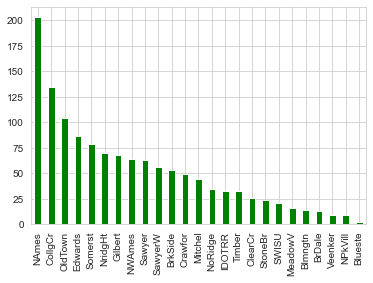

In [98]:
train['Neighborhood'].value_counts().plot(kind='bar', color= 'green')

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


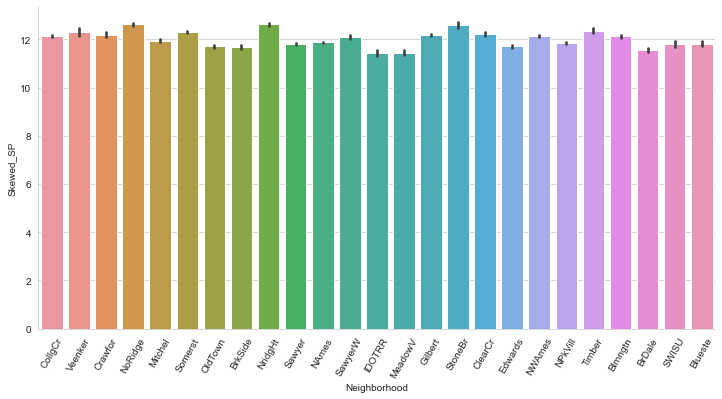

In [107]:
get = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=2)
get.set_xticklabels(rotation=60)

In [108]:
train['Condition1'].value_counts()

Norm      1127
Feedr       77
Artery      42
RRAn        26
PosN        15
RRAe         8
RRNn         5
PosA         5
RRNe         2
Name: Condition1, dtype: int64

In [109]:
train['Condition2'].value_counts()

Norm      1294
Feedr        6
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


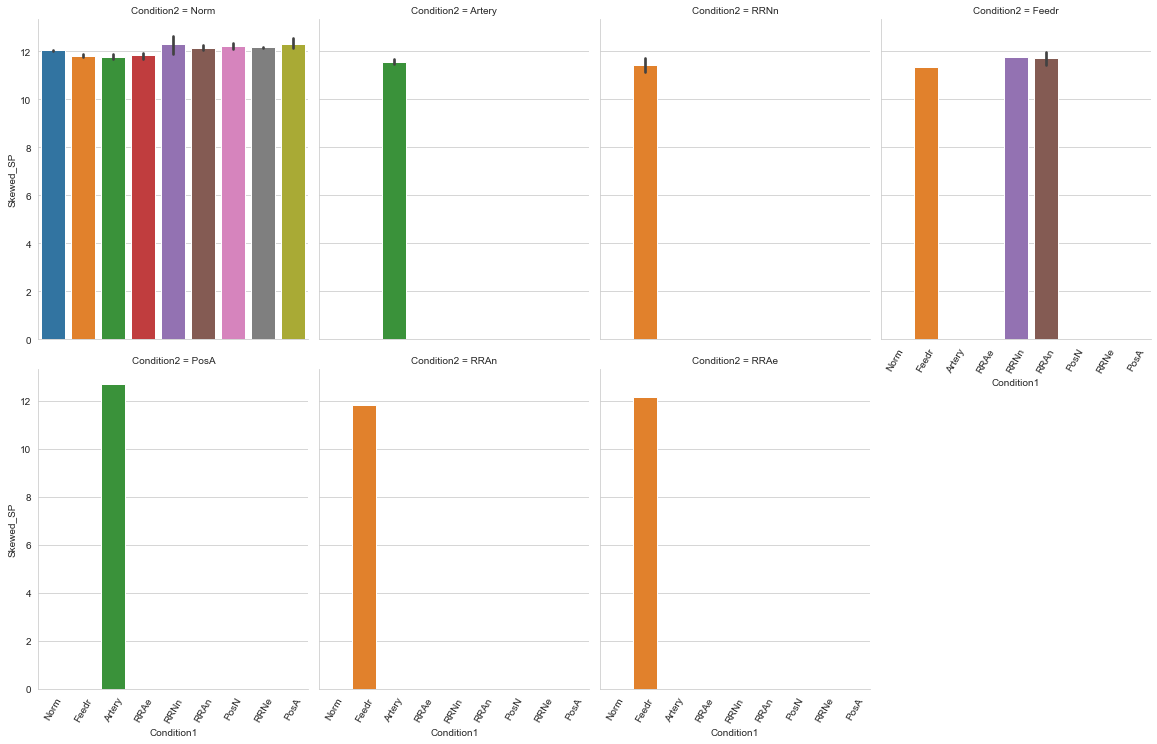

In [112]:
get = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
get.set_xticklabels(rotation=60)

In [113]:
train['SaleCondition'].value_counts()

Normal     1072
Partial     112
Abnorml      91
Family       17
Alloca       12
AdjLand       3
Name: SaleCondition, dtype: int64

In [114]:
train['SaleType'].value_counts()

WD       1132
New       109
COD        39
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

C:\Users\soumg\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


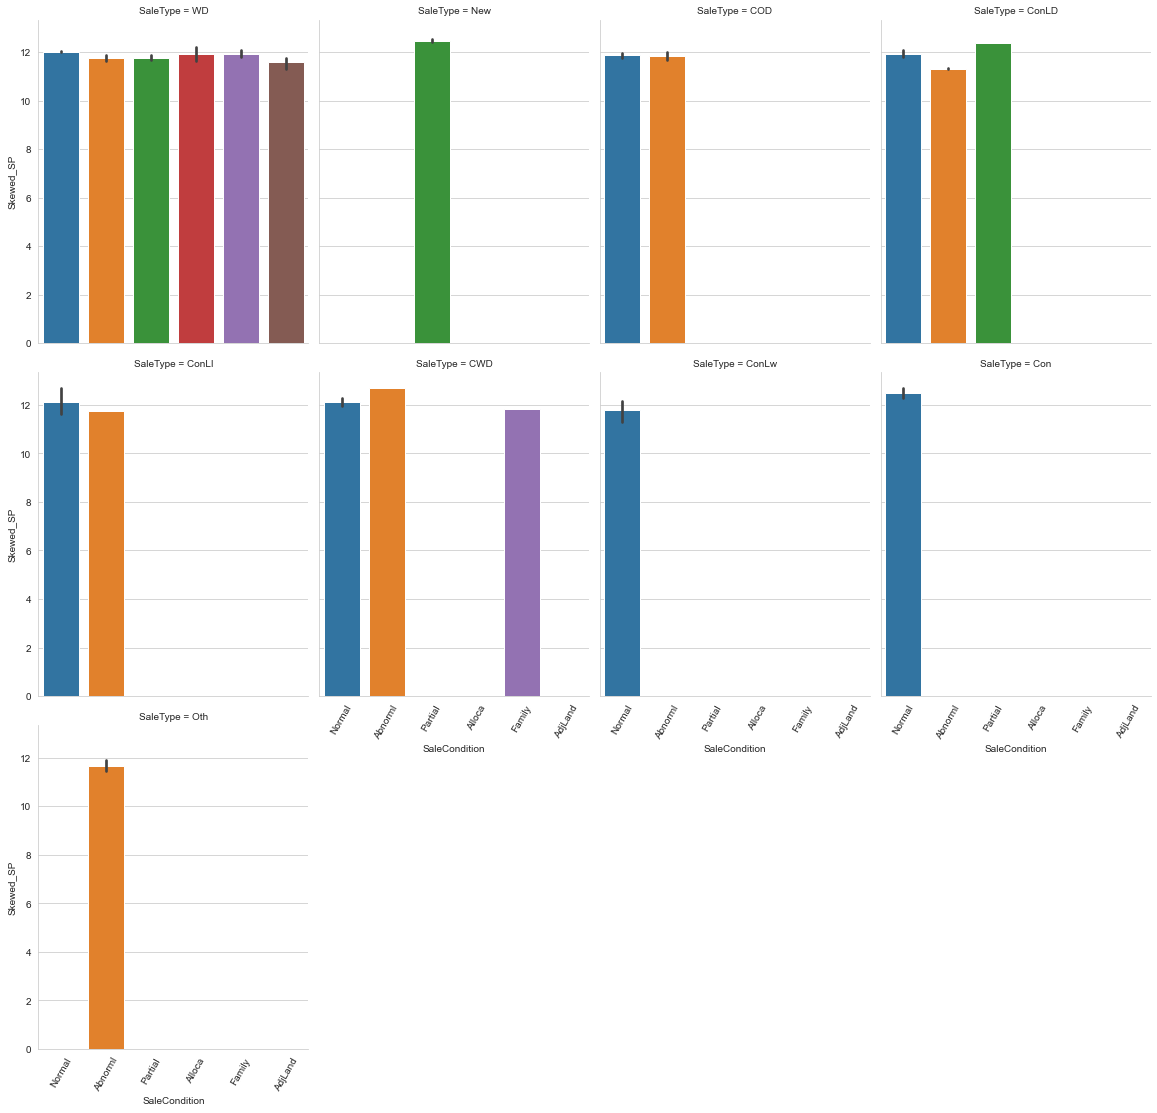

In [115]:
get = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
get.set_xticklabels(rotation=60)

###### Data Trasformation /


In [116]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1303
Grvl       4
Name: Street, dtype: int64 



##### Turn into one hot encoding 

In [117]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [118]:
# Encoded 
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1303
0       4
Name: enc_street, dtype: int64


####  Feature Engineering

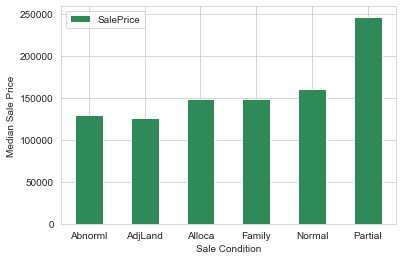

In [119]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='seagreen')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [120]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

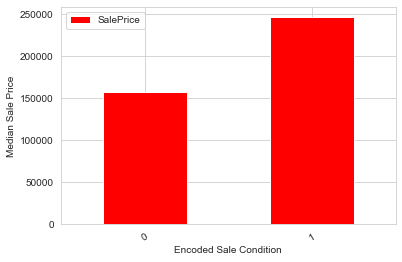

In [121]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=30)
plt.show()


###### Interpolation of data 

In [122]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [123]:
sum(data.isnull().sum() != 0)

0

##### Linear Model for the  train and test

In [134]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice'], axis=1)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [136]:
from sklearn import linear_model
from sklearn import ensemble

In [137]:
lr = ensemble.GradientBoostingRegressor()

In [139]:
model = lr.fit(X_train, y_train)

In [140]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.9996303222388708


In [141]:
predictions = model.predict(X_test)

In [144]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 6.045630081159249e-05


Text(0.5, 1.0, 'Linear Regression Model')

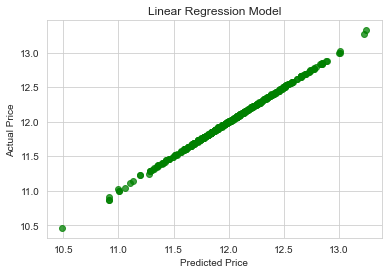

In [145]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

<ipython-input-146-ec5643b469f8>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


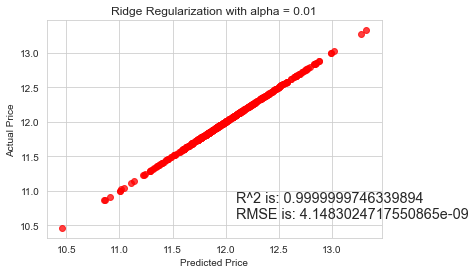

<ipython-input-146-ec5643b469f8>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


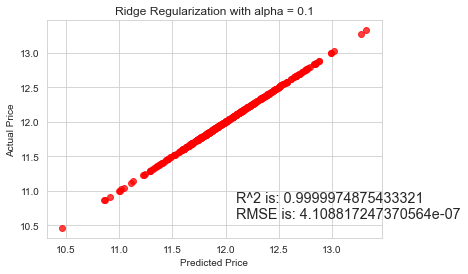

<ipython-input-146-ec5643b469f8>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


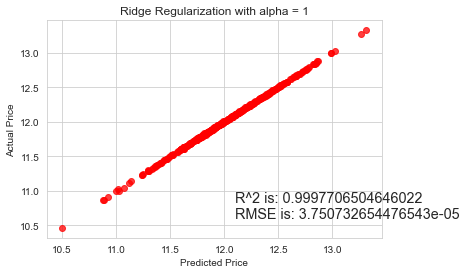

<ipython-input-146-ec5643b469f8>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


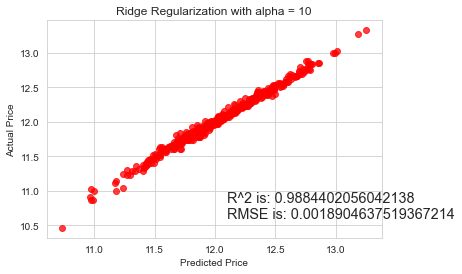

<ipython-input-146-ec5643b469f8>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


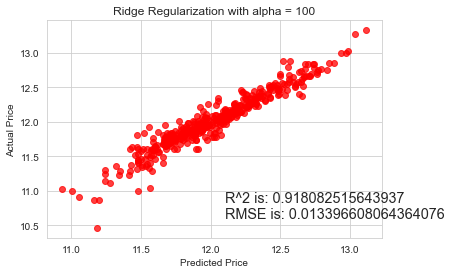

In [146]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [150]:
final_predictions = np.exp(predictions)

In [151]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [12.35642934 12.00197362 11.90529164 12.88659185 12.33615789] 

Final predictions are: 
 [232449.74616197 163076.32515931 148047.97318583 394980.56775299
 227785.09231451]


In [152]:
submission['SalePrice'] = final_predictions
submission.head()

,SalePrice
0,232449.746162
1,163076.325159
2,148047.973186
3,394980.567753
4,227785.092315


In [153]:
submission.to_csv('submission1.csv', index=False)

In [154]:
submission

,SalePrice
0,232449.746162
1,163076.325159
2,148047.973186
3,394980.567753
4,227785.092315
...,...
427,223979.912673
428,160619.262782
429,249768.345468
430,147088.167322
